In [3]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML



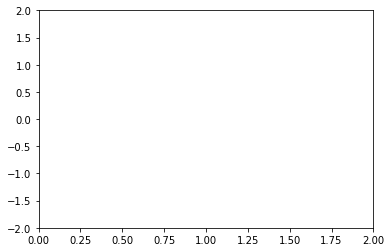

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [6]:
def init():
    line.set_data([], [])
    return (line,)

In [7]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


In [8]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [10]:
HTML(anim.to_jshtml())

# Fetch the challenge

In [10]:
import requests
import re

In [1]:
sessionId = "53616c7465645f5f7410c84952890a3c1eacddbaee80e14d0c44bda607334985b82645be2a910223f1ea3089d099bbd8"

In [3]:
url = "https://adventofcode.com/2018/day/10/input"
with requests.session() as sess:
    sess.cookies["session"] = sessionId
    challenge = sess.get(url).text

Lines are of the form

`position=< 31351, -51811> velocity=<-3,  5>`

In [8]:
class Star:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def step(self):
        self.x += self.vx
        self.y += self.vy
        return (self.x, self.y)
    

In [11]:
pat = re.compile(r'position=<(.*),(.*)>\s*velocity=<(.*),(.*)>')

In [14]:
def starBuilder():
    for line in challenge.split("\n"):
        m = pat.match(line)
        if m:
            yield Star(*(int(x) for x in m.groups()))

In [37]:
stars = list(star for star in starBuilder())
xMin = min(star.x for star in stars)
xMax = max(star.x for star in stars)
yMin = min(star.y for star in stars)
yMax = max(star.y for star in stars)

In [38]:
fig2, ax2 = plt.subplots()
ax2.set_xlim((xMin, xMax))
ax2.set_ylim((yMin, yMax))
line2, = ax2.plot([], [], '.')

def init2():
    line2.set_data([star.x for star in stars], [star.y for star in stars])
    return (line2,)
    
def animate2(i):
    x = [xx for (xx,yy) in map(lambda s: s.step(), stars)]
    y = [star.y for star in stars]
    line2.set_data(x, y)
    return (line2,)
anim2 = animation.FuncAnimation(fig2, animate2, init_func=init2,
                               frames=100, interval=1, blit=True)

In [39]:
HTML(anim2.to_jshtml())

In [50]:
fig3, ax3 = plt.subplots()
ax3.set_xlim((xMin, xMax))
ax3.set_ylim((yMin, yMax))
line3, = ax3.plot([], [], '.')

def init3():
    line3.set_data([star.x for star in stars], [star.y for star in stars])
    return (line3,)
    
def animate3(i):
    x = [xx for (xx,yy) in map(lambda s: s.step(), stars)]
    y = [star.y for star in stars]
    line3.set_data(x, y)
    return (line3,)
anim3 = animation.FuncAnimation(fig3, animate3, init_func=init3,
                               frames=200, interval=10, blit=True)

In [51]:
HTML(anim3.to_jshtml())